In [2]:
import math

from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

(_,_), (X, y) = mnist.load_data()

In [4]:
X.reshape([-1, 28*28])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

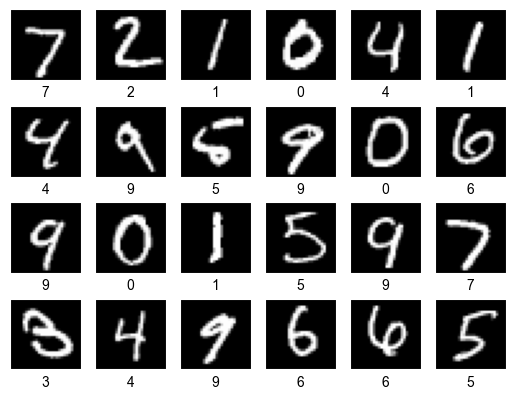

In [5]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i],
                   color='black')

In [5]:
X.shape

(10000, 28, 28)

In [6]:
X_vectorized = X.reshape((-1, 28 * 28))
# X_vectorized = np.float32(X_vectorized)
X_vectorized.shape

(10000, 784)

In [7]:
X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
X_vectorized[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [18]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

def split_dataset(dataset: pd.DataFrame, column: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    return dataset.drop(column, axis=1), dataset[column]


def get_clusters(X):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=23)

    clusterer = KMeans(random_state=23, n_clusters=10)
    clusterer.fit(X_train)
    Y_predicted = clusterer.predict(X_test)

    return Y_predicted, clusterer

In [19]:
clusters, clusterer = get_clusters(X_vectorized)
clusters

array([5, 8, 9, ..., 7, 5, 3])

In [20]:
(clusters == 0).sum()

169

In [21]:
labels = clusterer.labels_
labels[labels == 0].shape

(617,)

In [12]:
centroids = clusterer.cluster_centers_.reshape(10, 28, 28)

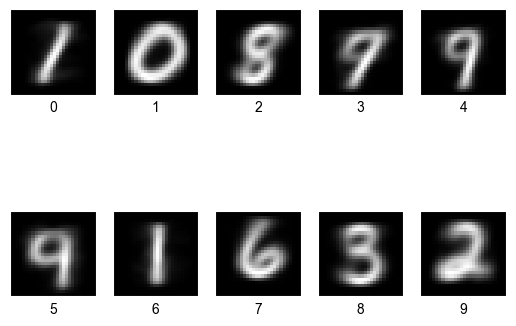

In [13]:
fig, ax = plt.subplots(2, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(centroids[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(i,
                   color='black')

In [59]:
def get_clusters_with_labels(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)

    clusterer = KMeans(random_state=23, n_clusters=10)
    clusterer.fit(X_train)
    clusters = clusterer.predict(X_test)
    cluster_df = pd.DataFrame(np.array([clusters, Y_test]).T, columns=['cluster', 'label'])
    # cluster_mapping = [clusters for cluster in range(10)]
    cluster_df.groupby('cluster')

    return clusterer

get_clusters_with_labels(X_vectorized, y)

KeyboardInterrupt: 

# Task 2

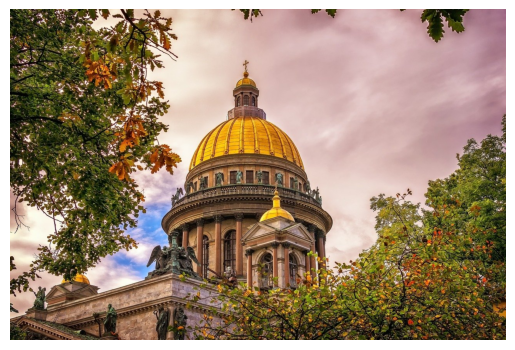

In [8]:
import cv2

img_path = 'data/8/spb_st_isaacs.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

In [9]:
np.round(np.sum(img) / (img.shape[0] * img.shape[1] * img.shape[2]), 3)

123.058

In [10]:
img = img / 255

In [11]:
np.round(np.sum(img) / (img.shape[0] * img.shape[1] * img.shape[2]), 3)

0.483

In [12]:
# The function takes as input a "straightened" array corresponding to the image

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

In [13]:
img = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))
img.shape

(1091840, 3)

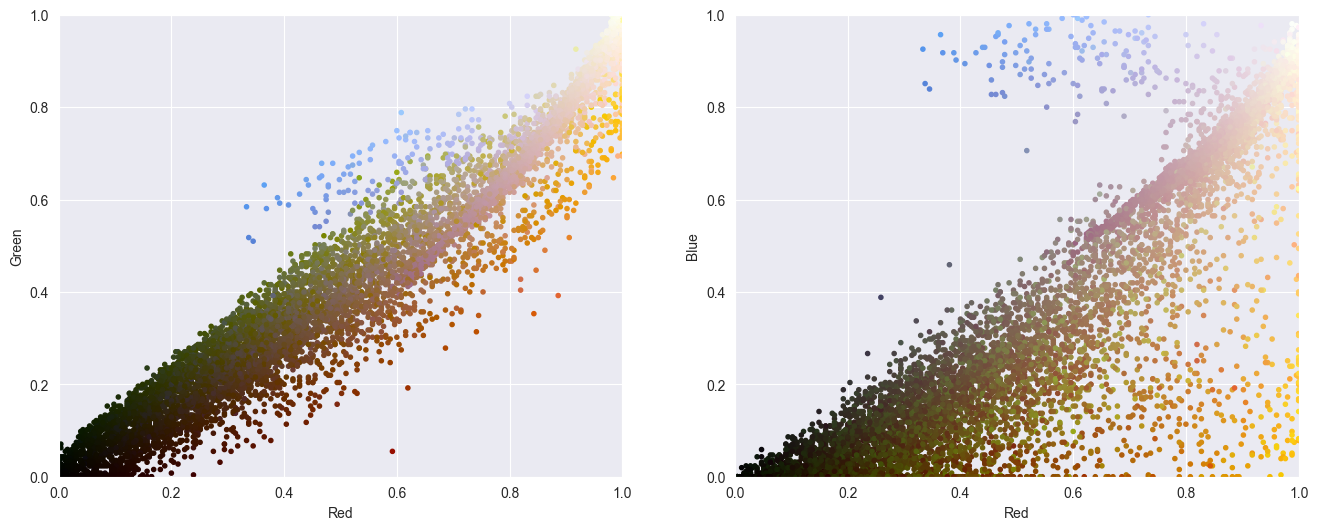

In [14]:
plot_pixels(img)

In [15]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=16, random_state=14)
kmeans.fit(img)

C:\Users\Quarter\PycharmProjects\MLCourse\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


MiniBatchKMeans(n_clusters=16, random_state=14)

In [23]:
colors = kmeans.predict(img)
colors

array([13,  5,  5, ..., 11,  1,  1])

In [24]:
kmeans.cluster_centers_

array([[0.9578146 , 0.89783552, 0.84611219],
       [0.31814716, 0.24677405, 0.08482417],
       [0.89623928, 0.65199545, 0.14168541],
       [0.88543873, 0.77610739, 0.75058229],
       [0.72322922, 0.57319147, 0.57797523],
       [0.06161487, 0.04369357, 0.00543224],
       [0.5118376 , 0.4155828 , 0.27880147],
       [0.37919059, 0.30638838, 0.20689896],
       [0.63469443, 0.52006029, 0.39427661],
       [0.6498644 , 0.43626112, 0.11139648],
       [0.82186926, 0.68551179, 0.67852883],
       [0.23215752, 0.18143113, 0.05501518],
       [0.4468356 , 0.35884704, 0.09078012],
       [0.15096794, 0.11406329, 0.02453736],
       [0.82305757, 0.68436441, 0.43989784],
       [0.561008  , 0.65985259, 0.90800421]])

In [26]:
img_new = kmeans.cluster_centers_[colors]
img_new

array([[0.15096794, 0.11406329, 0.02453736],
       [0.06161487, 0.04369357, 0.00543224],
       [0.06161487, 0.04369357, 0.00543224],
       ...,
       [0.23215752, 0.18143113, 0.05501518],
       [0.31814716, 0.24677405, 0.08482417],
       [0.31814716, 0.24677405, 0.08482417]])

In [33]:
np.round(np.sum(img_new) / (img_new.shape[0] * img_new.shape[1]), 3)

0.482

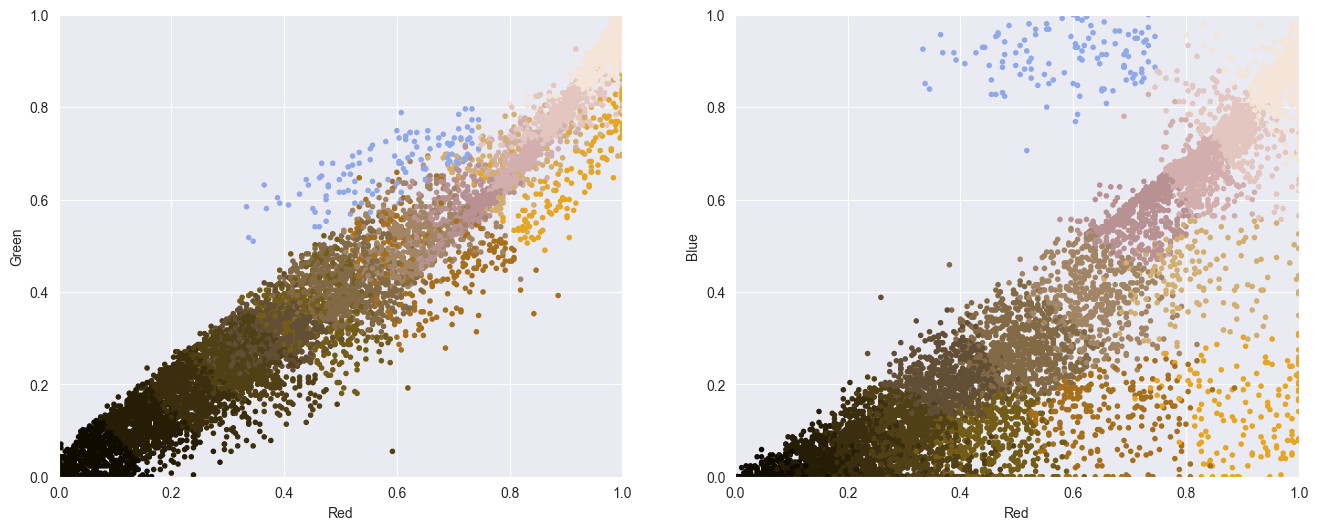

In [37]:
plot_pixels(img, img_new)

In [52]:
colors_new = kmeans.cluster_centers_.reshape((4, 4, 3))
colors_new

array([[[0.9578146 , 0.89783552, 0.84611219],
        [0.31814716, 0.24677405, 0.08482417],
        [0.89623928, 0.65199545, 0.14168541],
        [0.88543873, 0.77610739, 0.75058229]],

       [[0.72322922, 0.57319147, 0.57797523],
        [0.06161487, 0.04369357, 0.00543224],
        [0.5118376 , 0.4155828 , 0.27880147],
        [0.37919059, 0.30638838, 0.20689896]],

       [[0.63469443, 0.52006029, 0.39427661],
        [0.6498644 , 0.43626112, 0.11139648],
        [0.82186926, 0.68551179, 0.67852883],
        [0.23215752, 0.18143113, 0.05501518]],

       [[0.4468356 , 0.35884704, 0.09078012],
        [0.15096794, 0.11406329, 0.02453736],
        [0.82305757, 0.68436441, 0.43989784],
        [0.561008  , 0.65985259, 0.90800421]]])

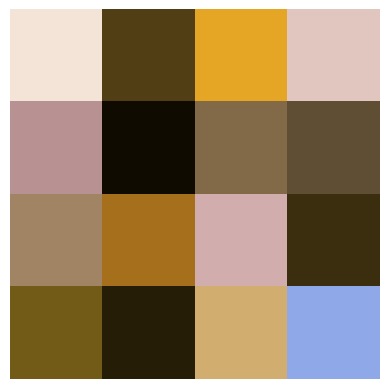

In [54]:
plt.axis('off')
plt.imshow(colors_new)